In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from random import randint,seed
plt.style.use('tableau-colorblind10')
from collections import Counter

In [2]:
tickers = ['^GSPC','XLE','XLF','XLU','XLI','GDX','XLK','XLV','XLY','XLP','XLB','XOP','IYR','XHB','ITB','VNQ','GDXJ','IYE','OIH','XME','XRT','SMH','IBB','KBE','XTL']

In [3]:
def analysis(ticker, start_date, end_date, time):
    # Download historical stock data using Yahoo Finance API
    data = yf.download(ticker, start_date, end_date)
    
    # Initialize an empty list to store returns
    returns = []
    
    # Iterate through each row (index) in the historical data
    for index in range(len(data)):
        # Get the closing price of the stock on the current day
        buy_price = data.iloc[index, 3]
        
        # Calculate the day to sell based on the current index and specified time
        days = index + time
        
        # Check if the calculated day to sell is within the range of data
        if days >= len(data):
            break
        else:
            # Get the closing price of the stock on the sell day
            sell_price = data.iloc[days, 3]
            
            # Calculate the profit percentage based on buy and sell prices
            profit = ((sell_price - buy_price) / buy_price) * 100
            
            # Append the calculated profit to the returns list
            returns.append(profit)
    
    # Return the list of profits (returns) calculated
    return returns


In [4]:
def plot(returns, ticker, start_date, end_date):
    # Download historical stock data using Yahoo Finance API
    data = yf.download(ticker, start_date, end_date)
    
    # Set up the figure size
    plt.figure(figsize=(10, 4))
    
    # Plot stock price
    plt.subplot(2, 1, 1)  # Subplot for stock price
    plt.plot(data['Close'], color='green')  # Plot closing prices
    plt.title(ticker, fontsize=16)  # Set title to ticker symbol
    plt.ylabel('Price ($)', fontsize=14)  # Set y-axis label
    
    # Plot stock returns
    plt.subplot(2, 1, 2)  # Subplot for stock returns
    plt.plot(returns, color='red')  # Plot returns
    plt.title(ticker + ' RETURNS', fontsize=16)  # Set title to ticker symbol + ' RETURNS'
    plt.ylabel('Pct. Return', fontsize=14)  # Set y-axis label for returns
    plt.axhline(0, color='k', linestyle='--')  # Add horizontal line at y=0 for reference
    
    plt.tight_layout()  # Adjust subplot parameters to give specified padding
    
    plt.show()  # Display the plot

In [5]:
# List of time periods
Test = pd.read_csv('Simulated Returns.csv')
time = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]

# Initialize empty lists to store results
Mean = []
Std = []
Days = []

# Iterate through each time period
for t in time:
    Days.append(t)  # Append current time period to Days list
    
    # Calculate mean and round to 4 decimal places
    Mean.append(np.round(Test[Test['Time'] == t]['Mean'].mean(), 4))
    
    # Calculate standard deviation and round to 4 decimal places
    Std.append(np.round(Test[Test['Time'] == t]['Std'].mean(), 4))


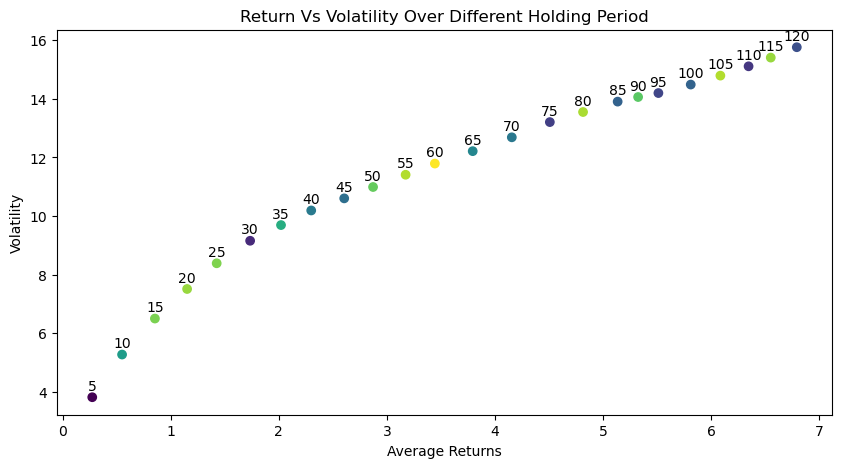

In [6]:
# Create a figure and axis with a specified size
fig, ax = plt.subplots(figsize=(10, 5))

# Generate random colors for each data point
colors = np.random.rand(24)

# Set labels for x-axis and y-axis
plt.xlabel('Average Returns')
plt.ylabel('Volatility')
plt.title('Return Vs Volatility Over Different Holding Period')

# Scatter plot with Mean as x-axis, Std as y-axis, and colors representing different data points
ax.scatter(Mean, Std, c=colors)

# Annotate each point with its corresponding time period (Days)
for i, label in enumerate(Days):
    ax.annotate(label,  # Text to display
                (Mean[i], Std[i]),  # Position of the annotation
                textcoords="offset points",  # Offset text position slightly
                xytext=(0,5),  # Position text vertically offset by 5 points
                ha='center')  # Center align the text horizontally


plt.savefig('C:/Users/ASUS ROG/Desktop/Stat 390/Returns.png')
plt.show()  # Display the plot

In [7]:
def annualised_return(mean_return, mean_volatility):
    """
    Calculates annualized return and annualized volatility.

    Parameters:
    - mean_return (float): Mean return over a period.
    - mean_volatility (float): Mean volatility (standard deviation) over a period.

    Returns:
    - annualised_return (float): Annualized return in percentage.
    - annualised_volatility (float): Annualized volatility (standard deviation) in percentage.
    """
    # Calculate annualized return using the formula: ((1 + mean_return)^12 - 1) * 100
    annualised_return = np.round(((1 + mean_return) ** 12 - 1) * 100, 2)
    
    # Calculate annualized volatility using the formula: mean_volatility * sqrt(12) * 100
    annualised_volatility = np.round((mean_volatility * np.sqrt(12)) * 100, 2)
    
    return annualised_return, annualised_volatility


In [17]:
def trend(choice, end_date):
    selected = []  # Initialize an empty list to store selected stocks
    
    # Calculate start date as 20 days before end_date
    start_date = end_date - timedelta(20)
    
    # Iterate through each stock ticker in the choice list
    for x in choice:
        # Download historical stock data for the current ticker from start_date to end_date
        data = yf.download(x, start_date, end_date).reset_index()

        if not data.empty:
            # Get the last closing price from the downloaded data
            last_price = data['Close'].iloc[-1]
            
            # Sort closing prices in descending order and select the top 5
            data = data['Close'].sort_values(ascending=False).head(1)
            
            # Calculate the average of the top 5 closing prices
            average = data.mean()
            
            # Compare the last closing price with the average of top 5 closing prices
            if last_price >= average:
                selected.append(x)  # Add the ticker to the selected list if condition is met
    
    return selected  # Return the list of selected tickers


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


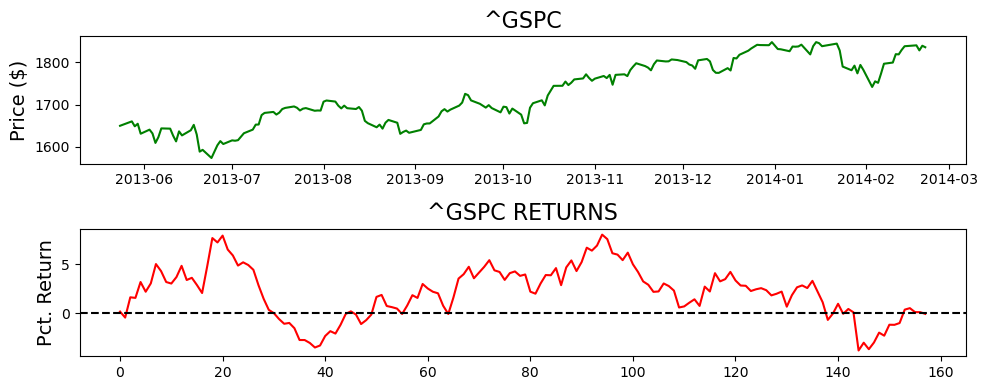

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


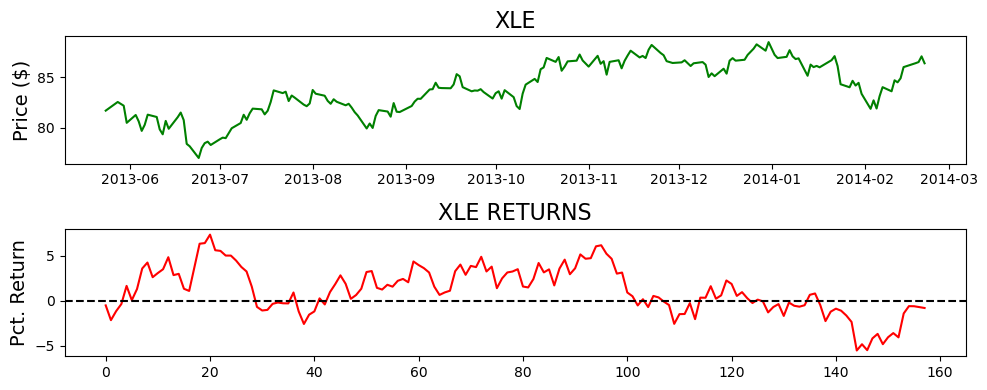

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


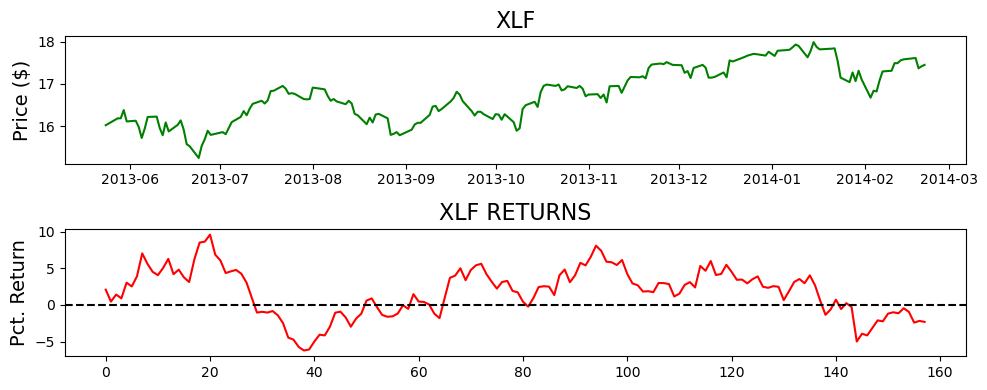

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


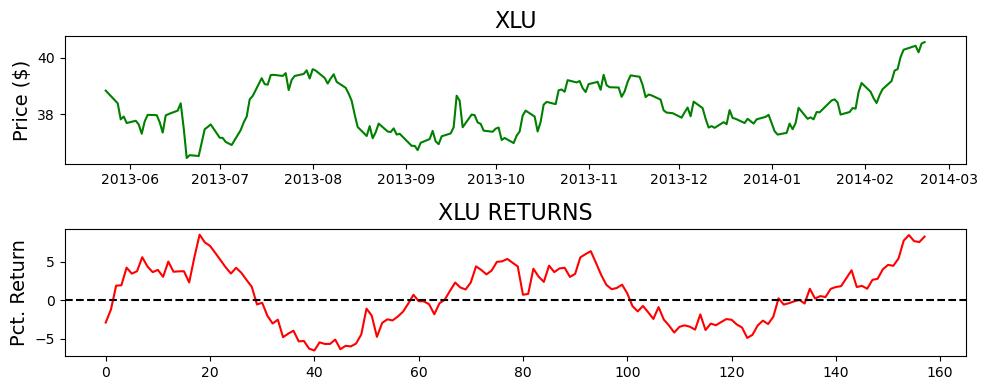

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


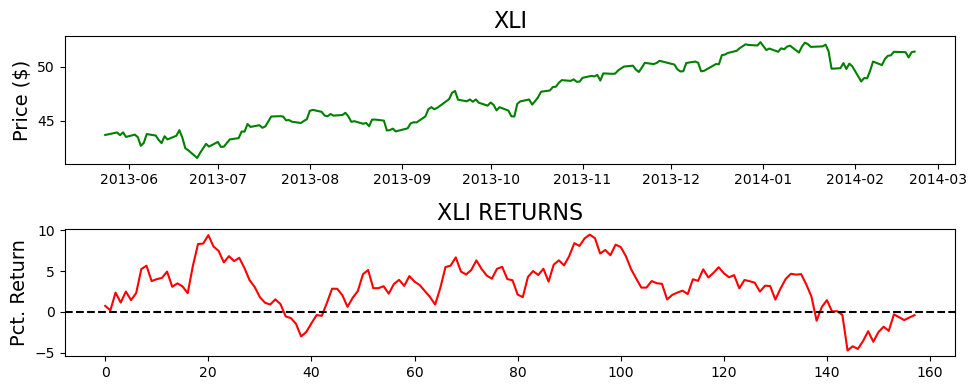

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


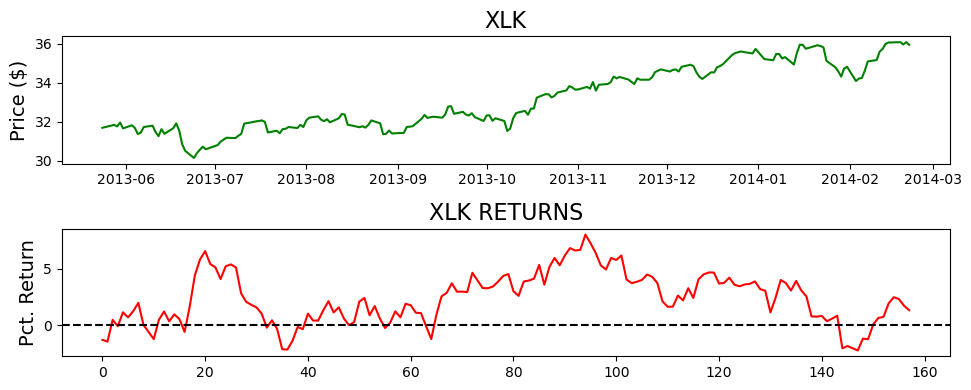

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


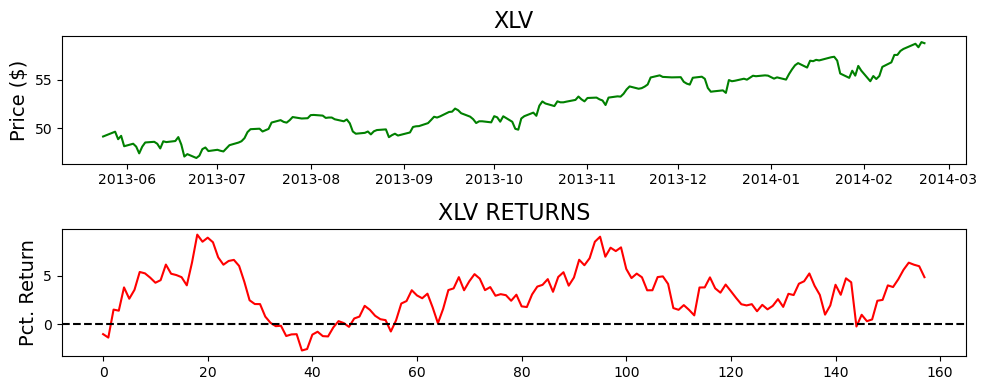

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


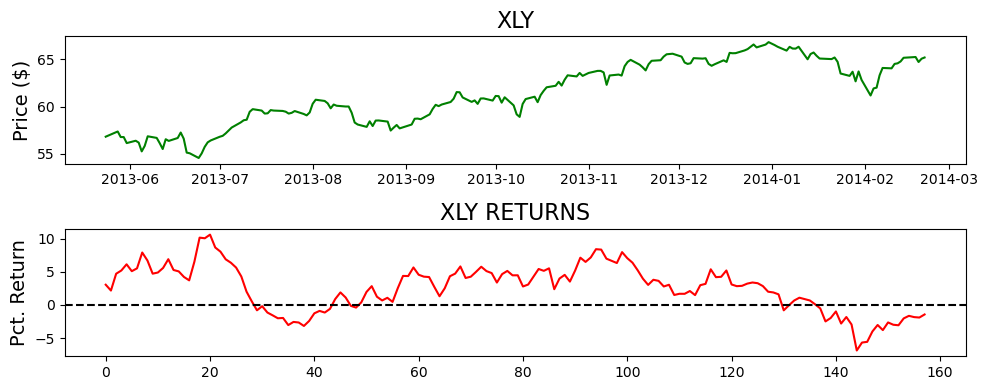

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


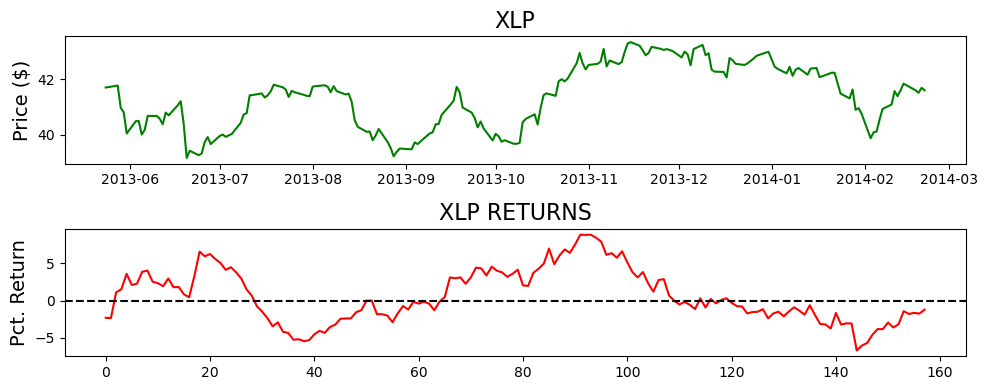

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


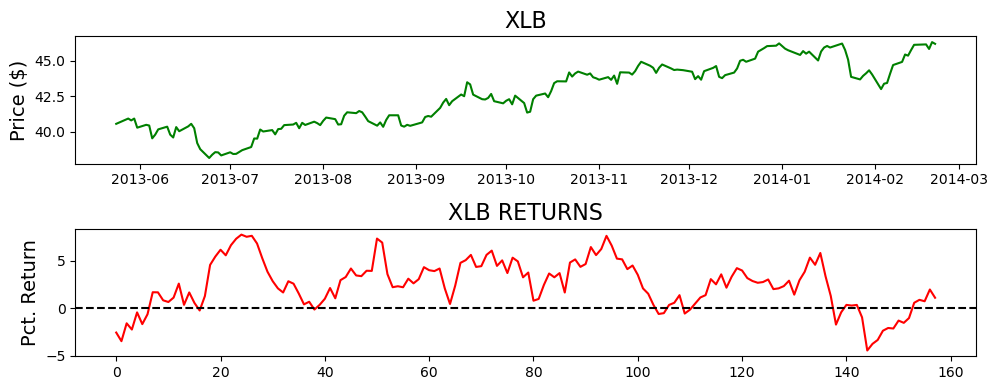

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


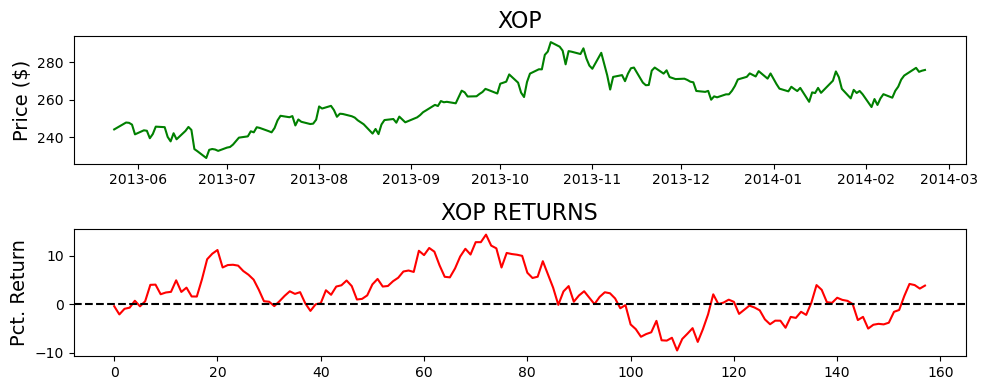

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


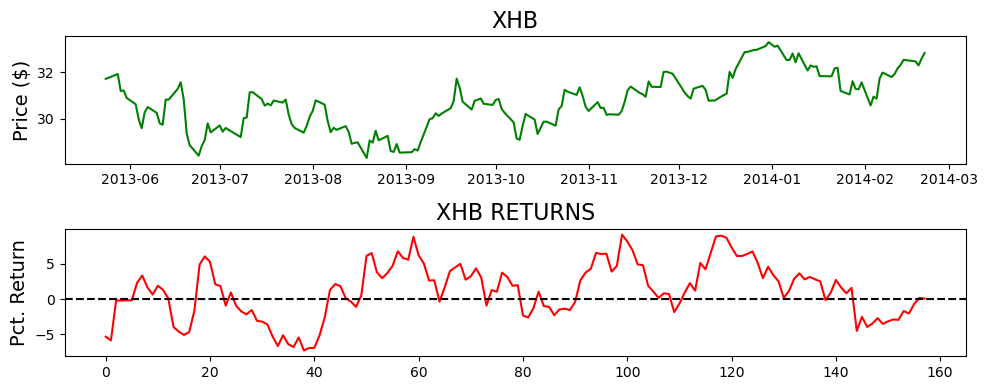

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


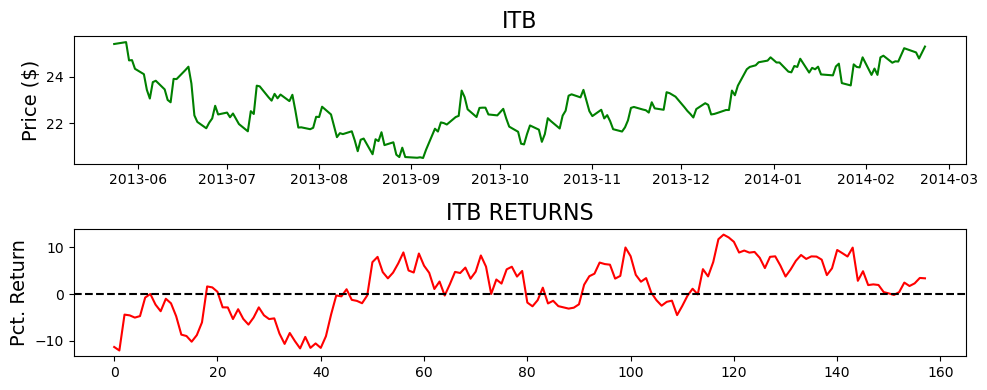

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


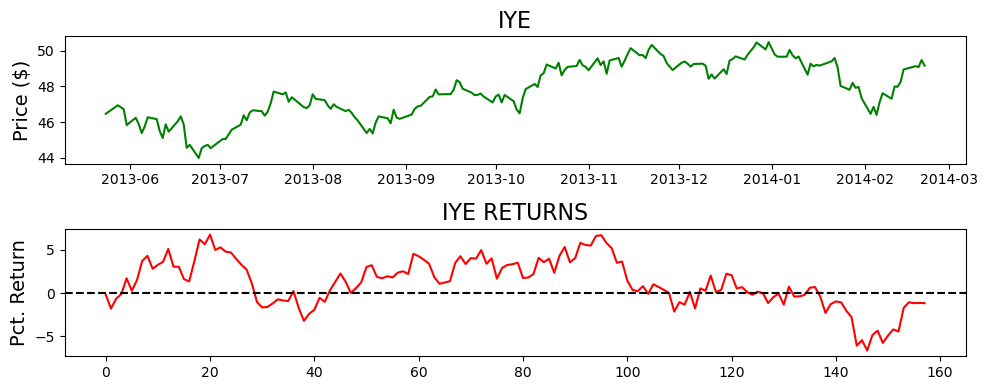

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


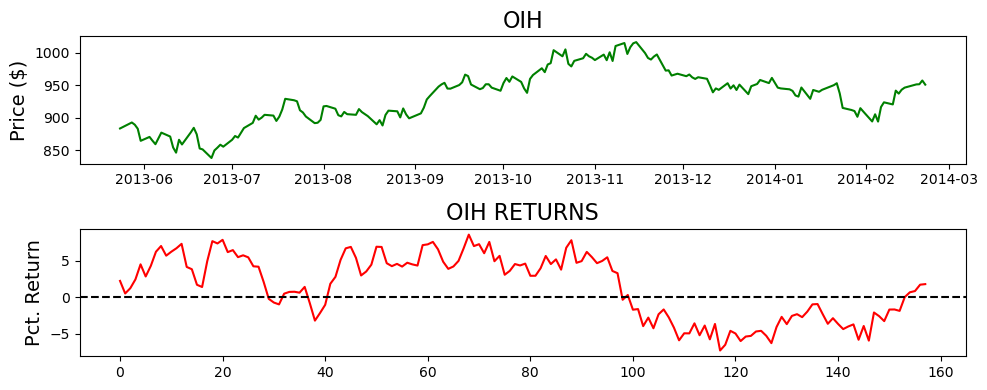

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


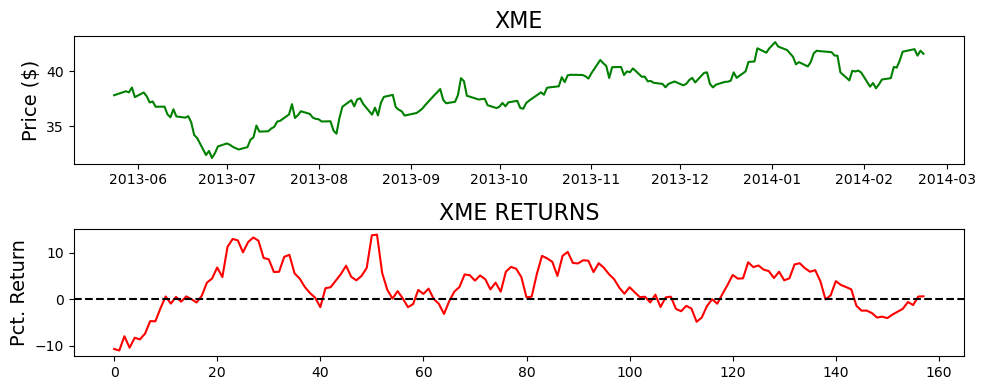

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


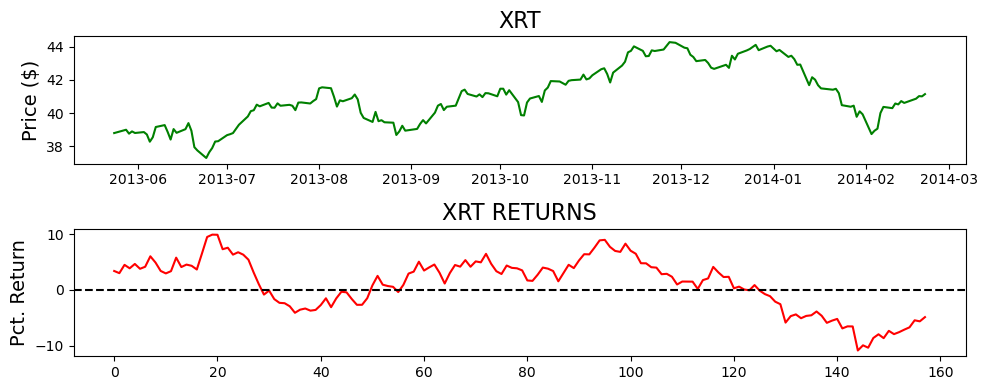

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


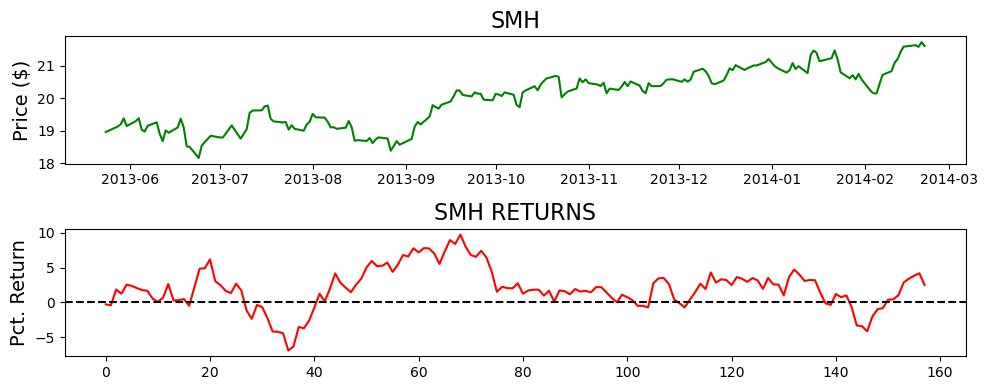

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


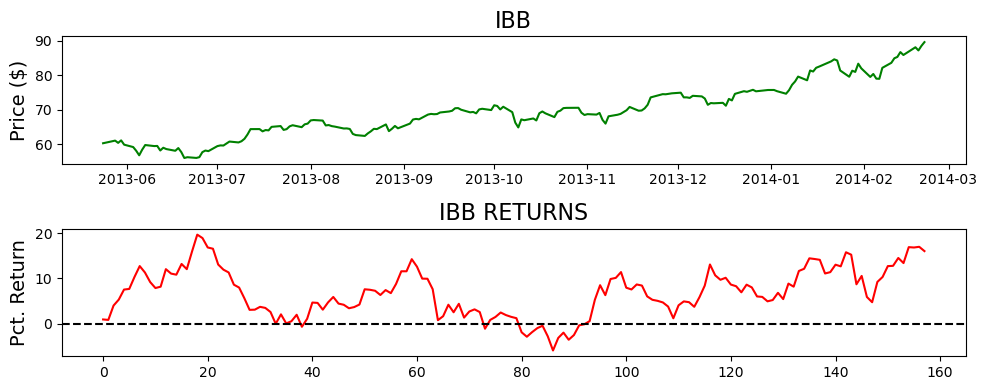

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


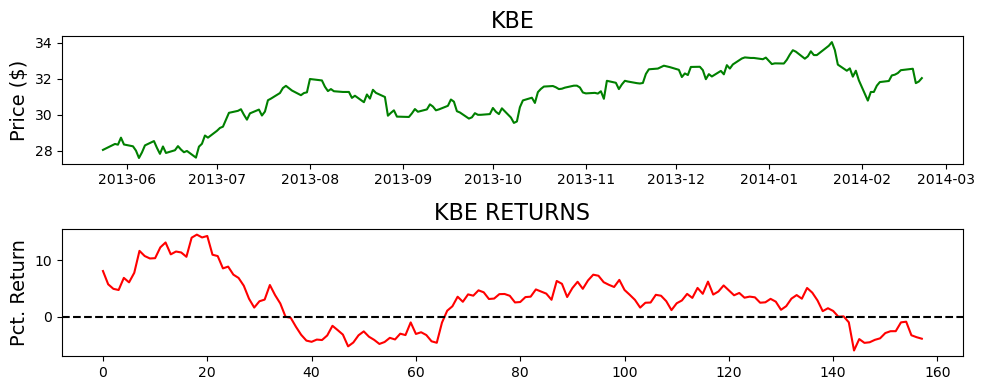

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


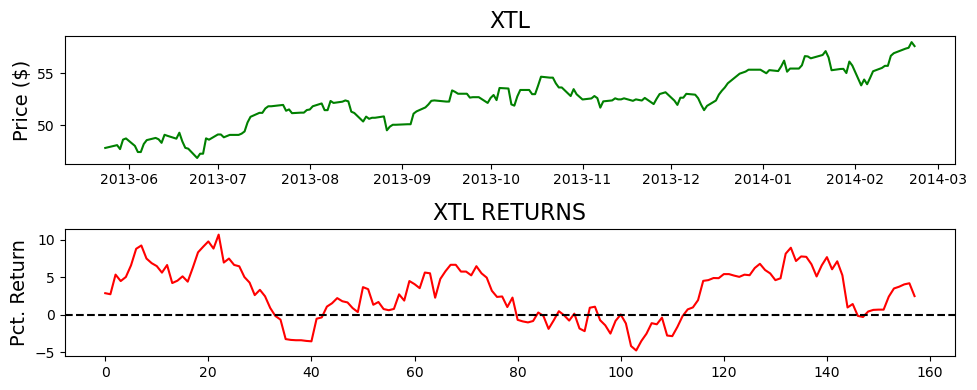

In [106]:
pct = 5  # Minimum annualized return threshold in percentage
volatility = 80  # Maximum annualized volatility threshold in percentage
time = 30  # Time period for analysis in days
dict = {}  # Initialize an empty dictionary to store results
choice = []  # Initialize an empty list to store selected tickers
i = 1  # Initialize index for dictionary keys

start_date = dt.datetime(2013, 5, 24)  # Start date for analysis
end_date = dt.datetime(2014, 2, 24)  # End date for analysis

# Iterate through each ticker in the list of tickers
for ticker in tickers:
    # Calculate returns for the current ticker and time period
    returns = analysis(ticker, start_date, end_date, time)

    if not len(returns)==0:
        # Calculate mean return and mean volatility (converted to decimal)
        mean_return = st.mean(returns) / 100
        mean_volatility = st.stdev(returns) / 100
        
        # Calculate annualized return and annualized volatility
        annual_return, annual_volatility = annualised_return(mean_return, mean_volatility)
        
        # Check if annualized return meets the threshold and annualized volatility is within the threshold
        if (annual_return >= pct and annual_volatility <= volatility):
            # Plot returns for the current ticker
            plot(returns, ticker, start_date, end_date)
            
            # Update mean and std with annualized values
            mean = annual_return
            std = annual_volatility
            
            # Add ticker to choice list and update dictionary with results
            choice.append(ticker)
            dict.update({i: [ticker, mean, std]})
            i = i + 1

# Create a DataFrame from dictionary and sort by Mean and Std in descending order
Returns = pd.DataFrame.from_dict(dict, orient='index', columns=['Ticker', 'Mean', 'Std'])
Returns = Returns.sort_values(by=['Mean', 'Std'], ascending=False)


In [107]:
Returns

,Ticker,Mean,Std
19,IBB,121.73,18.25
7,XLV,46.18,8.58
5,XLI,45.65,10.32
21,XTL,40.08,12.08
16,XME,38.27,17.18
20,KBE,37.63,16.61
8,XLY,36.05,12.07
10,XLB,34.48,8.91
6,XLK,32.33,7.80
1,^GSPC,28.83,9.06


In [108]:
selected = trend(choice,end_date)
selected

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

['XLU', 'XLI', 'XHB', 'ITB', 'XRT', 'IBB']

# Simulating Gap and Diff

In [12]:
count = 0  # Initialize a counter for buying opportunities
date1 = []  # Initialize empty lists to store dates for buying opportunities in condition 1
date2 = [] # # Initialize empty lists to store dates for buying opportunities in condition 2
val = [0.03,0.05,0.08,0.10,0.13,0.15,0.18,0.20] # Different values of gap and difference
dict = {}
i = 1

In [13]:
Trades = pd.read_csv('Gap & Diff.csv')

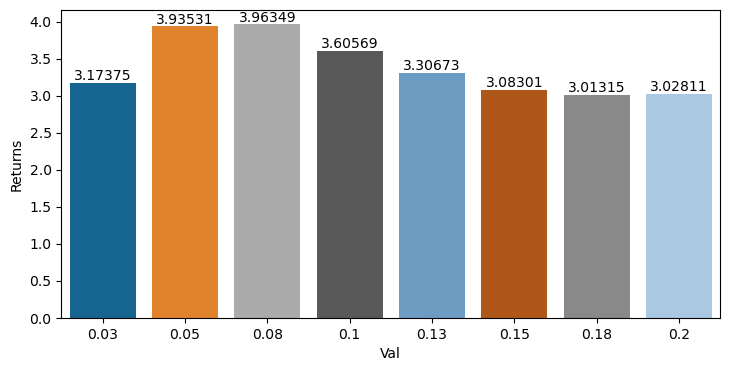

In [90]:
Vals = pd.read_csv('Returns on Gap & Diff.csv')
plt.figure(figsize=(8.5,4))
ax = sns.barplot(x = Vals['Val'], y = Vals['Returns'],errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10);
#plt.savefig('C:/Users/ASUS ROG/Desktop/Stat 390/Vals.png')

# The Algo

In [109]:
seed(1)
count = 0  # Initialize a counter for buying opportunities
date = []  # Initialize empty lists to store dates for buying opportunities
end_date = dt.datetime(2014, 2, 24)

# Loop 20 times to simulate different end dates
for _ in range(300):
    # Generate the next day after April 1, 2023
    end_date = end_date + timedelta(1)
    
    for ticker in selected:
            # Download historical data for the ticker from 30 days before end_date to end_date
            data = yf.download(ticker, end_date - timedelta(30), end_date).reset_index()
            
            # Calculate the 21-day and 9-day moving averages
            ma_21 = data['Close'].rolling(window=21).mean().iloc[-1]  # 21-day MA
            ma_9 = data['Close'].rolling(window=9).mean().iloc[-1]    # 9-day MA
            
            # Get the closing price of the ticker on the last day of the data
            price = data['Close'].iloc[-1]
            
            # Calculate percentage differences and gaps relative to price
            diff_9 = ((ma_9 - ma_21) / price) * 100
            gap_9 = ((price - ma_9) / price) * 100 if price > ma_9 else ((ma_9 - price) / price) * 100
            
            # Check conditions for potential buying opportunities based on moving averages and gaps
            if ma_9 <= ma_21 and diff_9 < 0.08 and gap_9 < 0.08:
                # Print ticker symbol and buy indication
                print(f"{ticker}: Buy ")
                count += 1  # Increment count of buying opportunities
                date.append(end_date)  # Store end_date in date1 list
                break  # Exit inner loop

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

IBB: Buy 



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

XLI: Buy 


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

XLI: Buy 



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

IBB: Buy 


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

XHB: Buy 



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

XLU: Buy 



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

XRT: Buy 


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

XLU: Buy 


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

XLU: Buy 



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

IBB: Buy 


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

XLU: Buy 



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

XHB: Buy 



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ITB: Buy 



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

# Visualising Trades

In [110]:
temp = []      # List to store profits
trades = []    # List to store trade results (1 for profit, 0 for loss)

# Iterate through each ticker in the 'choice' list
for ticker in selected:
    # Iterate through each date in the 'date' list
    for x in range(len(date)):
        start_date = date[x]                                # Get start date from 'date'
        end_date = start_date + timedelta(30)                # Calculate end date as 30 days after start_date
        
        # Download historical data for the ticker from start_date to end_date
        data = yf.download(ticker, start_date, end_date)
        data = data.reset_index()                            # Reset index of the downloaded data
        
        buy_price = data['Close'].iloc[0]                    # Get buy price (close price on start_date)
        sell_price = data['Close'].iloc[-1]                  # Get sell price (close price on end_date)
        
        profit = ((sell_price - buy_price) / buy_price) * 100 # Calculate profit percentage
        
        temp.append(profit)                                 # Append profit to temp1 list
        
        # Determine if the trade resulted in a profit (1) or loss (0)
        if buy_price < sell_price:
            trades.append(1)   # Profit
        else:
            trades.append(0)   # Loss


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

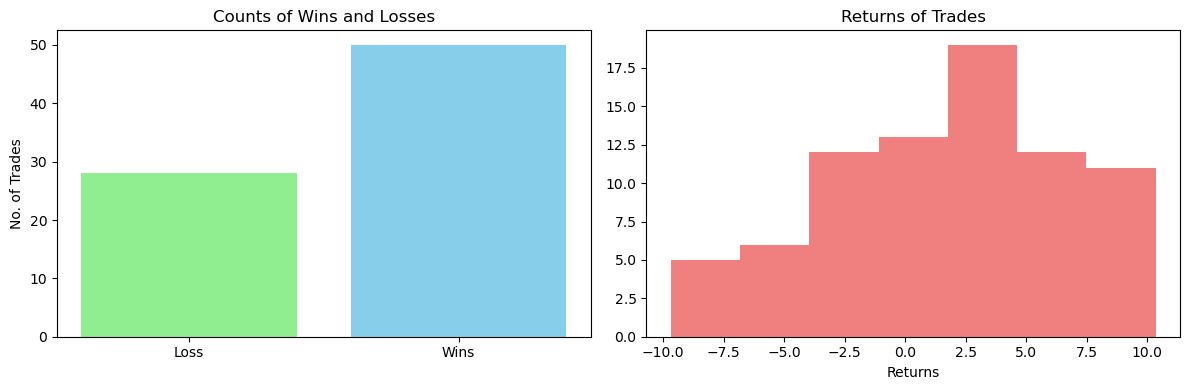

Mean return: 1.7614228884594512


[50, 28]

In [111]:
# Calculate trade result counts
counter = Counter(trades)
categories = list(counter.keys())  # 0 for losses, 1 for wins
counts = list(counter.values())

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Subplot 1: Bar chart of trade result counts
axs[0].bar(categories, counts, color=['skyblue', 'lightgreen'])
axs[0].set_title('Counts of Wins and Losses')
axs[0].set_ylabel('No. of Trades')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Loss', 'Wins'])

# Subplot 2: Histogram of trade returns
axs[1].hist(temp, bins=7, color='lightcoral')
axs[1].set_title('Returns of Trades')
axs[1].set_xlabel('Returns')

# Adjust layout and display the plot
plt.tight_layout()
#plt.savefig('C:/Users/ASUS ROG/Desktop/Stat 390/Out of Sample.png')
plt.show()

# Calculate and print the mean return
mean_return = st.mean(temp)  # Assuming st is a statistics library or similar
print(f"Mean return: {mean_return}")
counts

# Statistical Fitting

+--------------+----------------+---------+--------+------------------------------------------------+
| Distribution | KS D statistic | p-value |  AIC   |                   Parameters                   |
+--------------+----------------+---------+--------+------------------------------------------------+
|     norm     |     0.0568     | 0.9502  | 473.39 |                [1.7614 4.9037]                 |
|      t       |     0.0568     | 0.9502  | 475.39 | [6.22172854e+09 1.76140000e+00 4.90370000e+00] |
|   laplace    |     0.1058     | 0.3236  | 486.18 |                [2.1707 4.046 ]                 |
|    expon     |     0.2799     |   0.0   |  inf   |               [-9.6947 11.4562]                |
|   lognorm    |     0.0569     | 0.9495  | 475.55 |  [ 8.800000e-03 -5.551284e+02  5.568872e+02]   |
|     beta     |     0.0945     | 0.4612  | 468.07 |     [  1.7155   1.22   -10.218   20.6506]      |
|    gamma     |     0.0641     | 0.8857  | 476.07 |  [ 3.479752e+02 -9.045670e+01

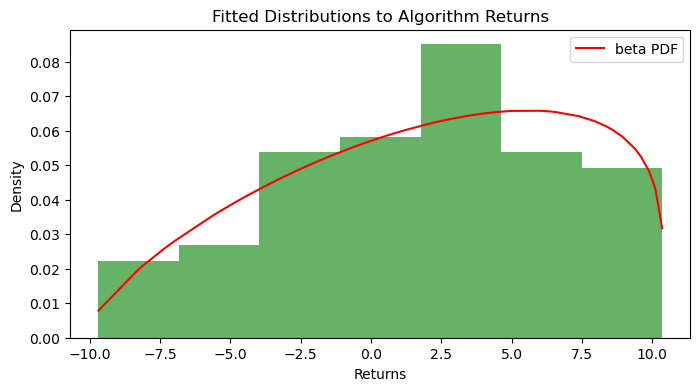

In [112]:
from scipy import stats
from tabulate import tabulate

returns = temp

# Define a list of distributions to check
distributions = [stats.norm, stats.t, stats.laplace, stats.expon, stats.lognorm, stats.beta, stats.gamma, stats.weibull_min]

# List to store the results
results = []

# Fit each distribution and calculate the goodness-of-fit metrics
for distribution in distributions:
    # Fit the distribution to the data
    params = np.round(distribution.fit(returns),4)
    
    # Get the fitted PDF
    pdf_fitted = np.round(distribution.pdf(np.sort(returns), *params[:-2], loc=params[-2], scale=params[-1]),4)
    
    # Kolmogorov-Smirnov test
    D, p_value = np.round(stats.kstest(returns, distribution.cdf, args=params),4)
    
    # Akaike Information Criterion
    log_likelihood = np.sum(np.log(distribution.pdf(returns, *params[:-2], loc=params[-2], scale=params[-1])))
    AIC = np.round(2 * len(params) - 2 * log_likelihood,2)
    
    results.append({
        'Distribution': distribution.name,
        'KS D statistic': D,
        'p-value': p_value,
        'AIC': AIC,
        'Parameters': params
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Print the results as a table
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

# Determine the best-fitting distribution based on AIC
best_fit = results_df.loc[results_df['AIC'].idxmin()]['Distribution']
print(f'\nBest fitting distribution: {best_fit}')

# Plot the data and the best-fitting distribution
best_fit_params = results_df.loc[results_df['Distribution'] == best_fit, 'Parameters'].values[0]
best_distribution = getattr(stats, best_fit)
pdf_fitted = best_distribution.pdf(np.sort(returns), *best_fit_params[:-2], loc=best_fit_params[-2], scale=best_fit_params[-1])

plt.figure(figsize=(8,4))
plt.hist(returns, bins=7, density=True, alpha=0.6, color='g')
plt.plot(np.sort(returns), pdf_fitted, 'r-', label=f'{best_fit} PDF')
plt.legend()
plt.xlabel('Returns')
plt.ylabel('Density')
plt.title('Fitted Distributions to Algorithm Returns')
#plt.savefig('C:/Users/ASUS ROG/Desktop/Stat 390/Fitting Distributions.png')
plt.show()

# Simulating Trading Account

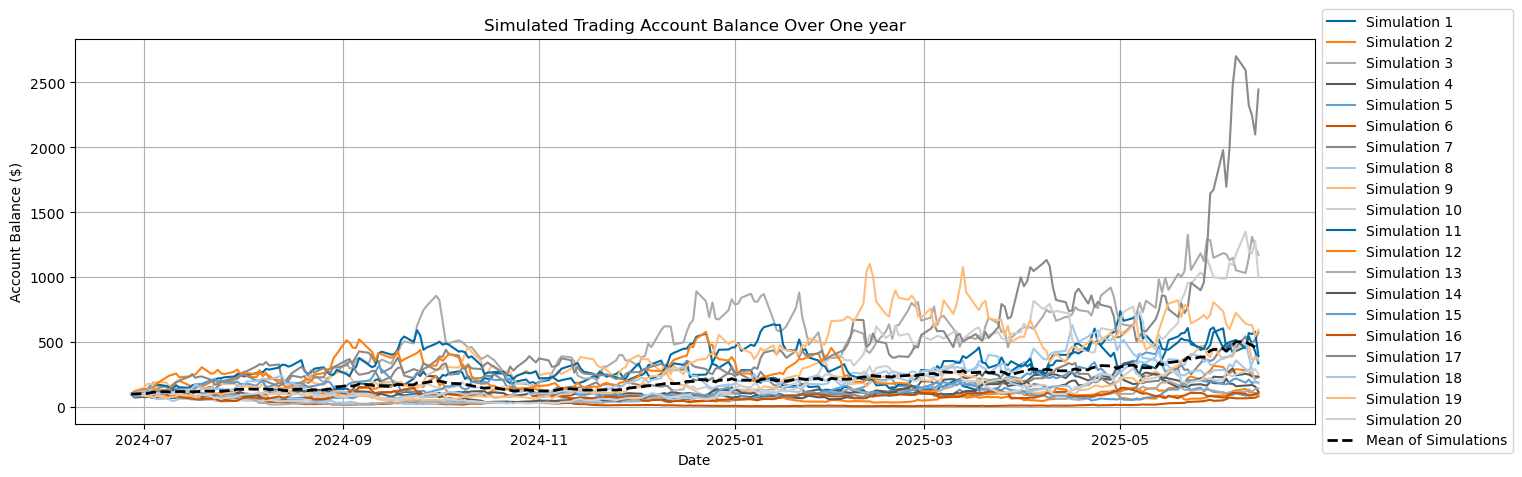

In [154]:
from scipy.stats import weibull_min

# Set initial account balance and Weibull distribution parameters
initial_balance = 100
shape, loc, scale = 1.8918, -6.3144, 9.4235
win_rate = 0.5714  # 57.14% win rate

# Define the number of trading days (3 years of trading days)
num_years = 1
num_days = num_years * 252  # Approx. 252 trading days in a year

# Number of simulations to run
num_simulations = 20

# Initialize a list to store all simulated account balances
all_simulations = []

# Simulate account balance over time for each run
for _ in range(num_simulations):
    # Generate daily returns from the Weibull distribution with specified win rate
    scale_adjusted = scale / win_rate
    daily_returns = weibull_min.rvs(shape, loc, scale_adjusted, size=num_days) / 100
    negative_returns_indices = np.random.choice(num_days, size=int(num_days * (1 - win_rate)), replace=False)
    daily_returns[negative_returns_indices] *= -1

    # Initialize account balance array
    account_balance = np.zeros(num_days)
    account_balance[0] = initial_balance

    # Simulate account balance over time
    for i in range(1, num_days):
        account_balance[i] = account_balance[i-1] * (1 + daily_returns[i])

    # Store the account balance simulation in the list
    all_simulations.append(account_balance)

# Convert the list of simulations into a DataFrame
dates = pd.date_range(start='2024-06-27', periods=num_days, freq='B')
simulation_df = pd.DataFrame(all_simulations, index=[f'Simulation {i+1}' for i in range(num_simulations)]).transpose()
simulation_df['Date'] = dates

# Calculate mean of all simulations
mean_balance = simulation_df.iloc[:, :num_simulations].mean(axis=1)

# Plot all simulations and the mean on the same line graph
plt.figure(figsize=(16, 5))
for i in range(num_simulations):
    plt.plot(simulation_df['Date'], simulation_df[f'Simulation {i+1}'], label=f'Simulation {i+1}')

plt.plot(simulation_df['Date'], mean_balance, color='black', linestyle='--', linewidth=2, label='Mean of Simulations')

plt.xlabel('Date')
plt.ylabel('Account Balance ($)')
plt.title('Simulated Trading Account Balance Over One year')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend on the left side
plt.grid(True)
plt.savefig('C:/Users/ASUS ROG/Desktop/Stat 390/Account Balance.png')
plt.show()